In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [156]:
df = pd.read_csv("C:\\Users\\nisar\\one drive\\Desktop\\IEEE\\combined_eeg_data.csv")
df = df.drop('file_name', axis=1)
df.head()

,channel0,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,channel9,channel10,channel11,channel12,channel13,channel14,channel15,label
0,347.78,198.73,637.59,298.09,278.77,77.28,259.45,408.50,118.69,-110.41,-460.94,-391.94,-11.04,278.77,-792.16,-281.53,0
1,507.87,358.82,659.67,317.42,378.14,198.73,378.14,449.90,179.41,-121.45,-422.30,-300.85,-22.08,309.14,-800.44,-240.13,0
2,488.54,449.90,488.54,317.42,378.14,419.54,529.95,499.58,149.05,-80.04,-41.40,129.73,138.01,309.14,-342.26,-11.04,0
3,369.86,309.14,328.46,289.81,317.42,397.46,507.87,458.18,88.32,27.60,259.45,427.82,309.14,289.81,69.00,259.45,0
4,347.78,149.05,248.41,289.81,328.46,408.50,529.95,477.50,187.69,458.18,797.68,858.40,687.27,378.14,877.72,709.36,0


In [158]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [166]:
X = df.drop(['label'], axis=1)  # EEG channels are the features
y = df['label']  # Target labels (0 for healthy, 1 for schizophrenic)

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [170]:
print(np.unique(y))

[0 1]


In [178]:
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

In [182]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [184]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Input
from tensorflow.keras.utils import plot_model

In [186]:
CNN_model = Sequential()

In [188]:
# Input layer using Input() to define the input shape
CNN_model.add(Input(shape=(X_train.shape[1], 1)))

In [190]:
# Add a Conv1D layer
CNN_model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))

In [192]:
# Flatten the output of the Conv1D layer before feeding into Dense layers
CNN_model.add(Flatten())

In [194]:
# Adding a Dense layer for further learning
CNN_model.add(Dense(64, activation='relu'))

In [196]:
# Output layer for binary classification (healthy = 0, schizophrenia = 1)
CNN_model.add(Dense(1, activation='sigmoid'))

In [204]:
CNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [206]:
CNN_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 15, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 960)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        61,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,761 (241.25 KB)

 Trainable params: 61,761 (241.25 KB)

 Non-trainable params: 0 (0.00 B)

In [208]:
# Training the model
history = CNN_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
16128/16128 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.6401 - loss: 0.6248 - val_accuracy: 0.6753 - val_loss: 0.5903
Epoch 2/20
16128/16128 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.6791 - loss: 0.5870 - val_accuracy: 0.6859 - val_loss: 0.5771
Epoch 3/20
16128/16128 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.6881 - loss: 0.5758 - val_accuracy: 0.6911 - val_loss: 0.5730
Epoch 4/20
16128/16128 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.6936 - loss: 0.5685 - val_accuracy: 0.6967 - val_loss: 0.5682
Epoch 5/20
16128/16128 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.6993 - loss: 0.5628 - val_accuracy: 0.6980 - val_loss: 0.5649
Epoch 6/20
16128/16128 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.7029 - loss: 0.5587 - val_accuracy: 0.6985 - val_loss: 0.5649
Epoch 7/20
16128/16128 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.7065 - loss: 0.5547 - val_accuracy: 0.7058 - val_loss: 0.5576
Epoch 8/20
16128/16128 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 

In [210]:
# Evaluating the model
y_pred_cnn = (CNN_model.predict(X_test) > 0.5).astype(int)


4032/4032 ━━━━━━━━━━━━━━━━━━━━ 2s 557us/step


In [214]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [216]:
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
conf_matrix_cnn = confusion_matrix(y_test, y_pred_cnn)
class_report_cnn = classification_report(y_test, y_pred_cnn)

In [218]:
print(f"Accuracy: {accuracy_cnn:.4f}")
print("Confusion Matrix:")
print(conf_matrix_cnn)
print("Classification Report:")
print(class_report_cnn)

Accuracy: 0.7145
Confusion Matrix:
[[40180 19621]
 [17214 52009]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.67      0.69     59801
           1       0.73      0.75      0.74     69223

    accuracy                           0.71    129024
   macro avg       0.71      0.71      0.71    129024
weighted avg       0.71      0.71      0.71    129024



In [220]:
import seaborn as sns

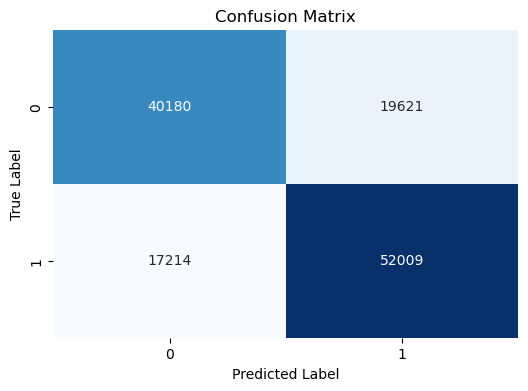

In [222]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_cnn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [224]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

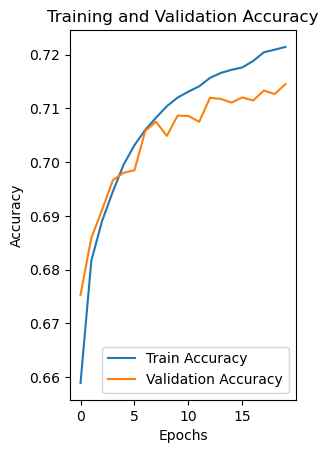

In [226]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

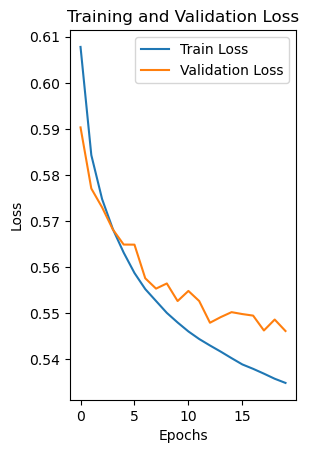

In [240]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()